In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.arima_model import ARMA, ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose

## 1. Compare the accuracy of prediction of the values of Robusta coffee time serieswith AR(1) and ARIMA(1,1,0) models.

In [46]:
df = pd.read_csv("cofee.csv", parse_dates=True, index_col="Month")
df.index.freqs="MS"
df.head()

,Price,Change
Month,,
2000-04-01,0.98,-
2000-05-01,0.98,0.00 %
2000-06-01,0.94,-4.08 %
2000-07-01,0.90,-4.26 %
2000-08-01,0.84,-6.67 %


In [54]:
# take 80% to train and 20% to test
s_index = int(0.8*df.shape[0])
train = df.iloc[:s_index]
test = df.iloc[s_index:]

Create ARMA(1,0) model and fit on training data.

In [55]:
res_AR1 = ARMA(train.Price, order=(1,0)).fit()

make predictions for this model

In [56]:
start = len(train)
end = len(train) + len(test)-1
predictions = res_AR1.predict(start=start, end=end, dynamic=False).rename("AR (1, 0) Predictions")

Print the predictions

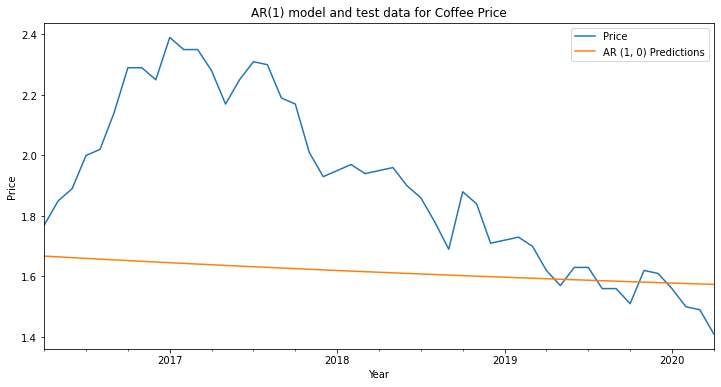

In [64]:
title = "AR(1) model and test data for Coffee Price"
ylabel="Price"
xlabel="Year"

ax=test.Price.plot(legend=True, figsize=(12,6), title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x', tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
plt.show()

Create ARIMA(1,1,0) model and do the same

In [58]:
res_ARIMA = ARIMA(train.Price, order=(1,1,0)).fit()
predictions_ARIMA = res_ARIMA.predict(start=start, end=end, dynamic=False, typ="levels").rename("ARIMA (1, 1, 0) Predictions")

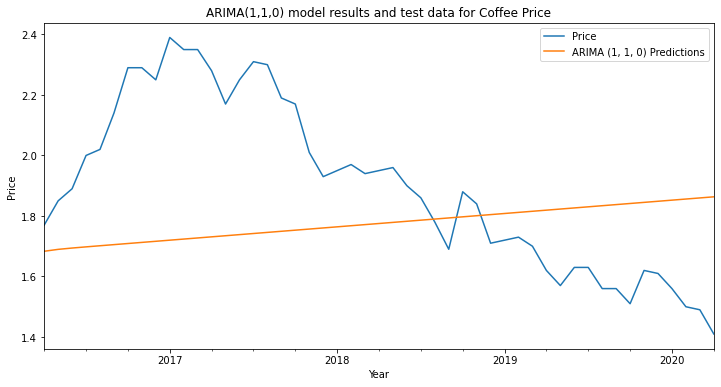

In [59]:
title = "ARIMA(1,1,0) model results and test data for Coffee Price"
ylabel="Price"
xlabel="Year"

ax=test.Price.plot(legend=True, figsize=(12,6), title=title)
predictions_ARIMA.plot(legend=True)
ax.autoscale(axis='x', tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
plt.show()

Compare the errors that the models are making on the test data

In [60]:
AR_ms_error = mean_squared_error(test.Price, predictions)
ARIMA_ms_error = mean_squared_error(test.Price, predictions_ARIMA)
AR_rmse = rmse(test.Price, predictions)
ARIMA_rmse = rmse(test.Price, predictions_ARIMA)
print(f"Mse: \t AR(1,0): {AR_ms_error}, \t ARIMA(1,1,0): {ARIMA_ms_error}")
print(f"Rmse: \t AR(1,0): {AR_rmse}, \t ARIMA(1,1,0): {ARIMA_rmse}")

Mse: 	 AR(1,0): 0.1459762722917637, 	 ARIMA(1,1,0): 0.11897151353930095
Rmse: 	 AR(1,0): 0.38206841310394096, 	 ARIMA(1,1,0): 0.3449224746798923


### We see that the ARIMA(1,1,0) is making a smaller error. But we see that the line predicted is not getting the trend of the real data. 

## 2. Forecast the monthly consumption of natural gas in the US using the SARIMA model

In [61]:
gas_df = pd.read_csv("U.S._Natural_Gas_Total_Consumption.csv", parse_dates=True, index_col="Month")[::-1]
gas_df.index.freq="MS"
# rename for simplicity
gas_df.columns = ["Consumption"]

In [62]:
gas_df.head()

,Consumption
Month,
2001-01-01,2676998
2001-02-01,2309464
2001-03-01,2246633
2001-04-01,1807170
2001-05-01,1522382


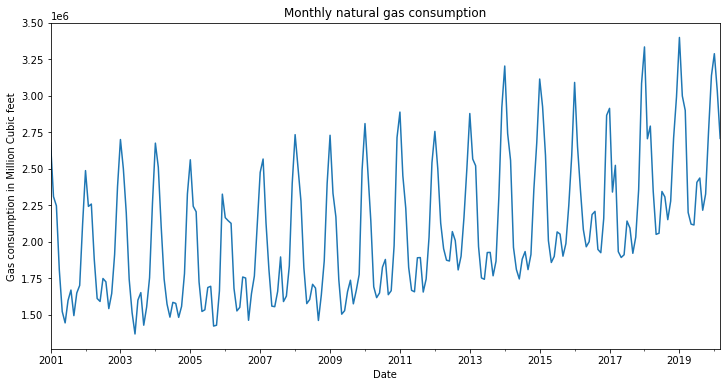

In [63]:
ax = gas_df.Consumption.plot(figsize=(12,6))
plt.title("Monthly natural gas consumption")
plt.ylabel("Gas consumption in Million Cubic feet")
plt.xlabel("Date")
plt.show()

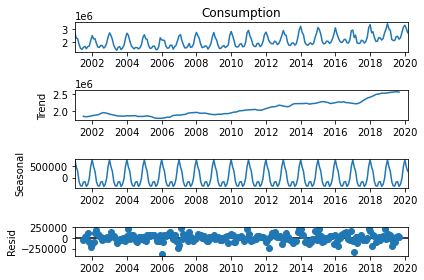

In [24]:
seasonal_result = seasonal_decompose(gas_df.Consumption, model="add")
seasonal_result.plot();

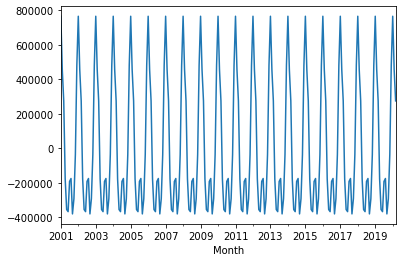

In [25]:
seasonal_result.seasonal.plot();

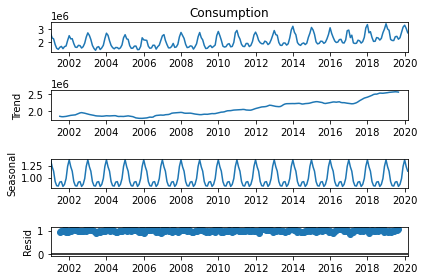

In [26]:
seasonal_result = seasonal_decompose(gas_df.Consumption, model="mult")
seasonal_result.plot();

In [31]:
stepwise_fit = auto_arima(
    gas_df.Consumption,
    max_order=8,
    d=None,
    D=None,
    m=12,
    max_p=4,
    max_q=5,
    max_P=2,
    max_Q=2,
    n_jobs=-1,
    stepwise=False,
    trace=True
)

Total fit time: 87.610 seconds


In [32]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  231
Model:             SARIMAX(2, 1, 4)x(1, 0, [1], 12)   Log Likelihood               -3090.053
Date:                              Mon, 01 Jun 2020   AIC                           6200.106
Time:                                      19:52:11   BIC                           6234.487
Sample:                                           0   HQIC                          6213.975
                                              - 231                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2.643e+04   1.07e+04      2.474      0.013    5494.037    4.74e+04
ar.L1         -1.7326      0.044    -39.084      0.000      -1.820      -1.646
ar.L2         -0.9497      0.043    -22.319      0.000      -1.033      -0.866
ma.L1          1.6483      0.056     29.427      0.000       1.539       1.758
ma.L2          0.7483      0.112      6.685      0.000       0.529       0.968
ma.L3         -0.2188      0.130     -1.688      0.091      -0.473       0.035
ma.L4         -0.0928      0.067     -1.378      0.168      -0.225       0.039
ar.S.L12       0.9071      0.020     46.079      0.000       0.869       0.946
ma.S.L12      -0.6147      0.042    -14.500      0.000      -0.698      -0.532
sigma2      2.672e+10      0.022   1.23e+12      0.000    2.67e+10    2.67e+10
===================================================================================
Ljung-Box (Q):                      105.22   Jarque-Bera (JB):                66.92
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.60   Skew:                            -0.62
Prob(H) (two-sided):                  0.03   Kurtosis:                         5.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.05e+27. Standard errors may be unstable.
"""

In [33]:
train = gas_df.iloc[:-12]
test = gas_df.iloc[-12:]

In [35]:
model = SARIMAX(train.Consumption, order=(2,1,4), seasonal_order=(1,0,1,12))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                          Consumption   No. Observations:                  219
Model:             SARIMAX(2, 1, 4)x(1, 0, [1], 12)   Log Likelihood               -2913.702
Date:                              Mon, 01 Jun 2020   AIC                           5845.405
Time:                                      19:54:00   BIC                           5875.865
Sample:                                  01-01-2001   HQIC                          5857.708
                                       - 03-01-2019                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6537      0.972      0.673      0.501      -1.251       2.558
ar.L2         -0.2389      0.624     -0.383      0.702      -1.461       0.983
ma.L1         -0.8171      0.968     -0.844      0.399      -2.715       1.081
ma.L2          0.2166      0.777      0.279      0.780      -1.306       1.739
ma.L3         -0.1162      0.087     -1.337      0.181      -0.287       0.054
ma.L4         -0.1028      0.150     -0.684      0.494      -0.397       0.192
ar.S.L12       0.9690      0.020     47.509      0.000       0.929       1.009
ma.S.L12      -0.8349      0.058    -14.492      0.000      -0.948      -0.722
sigma2      2.888e+10   1.23e-11   2.34e+21      0.000    2.89e+10    2.89e+10
===================================================================================
Ljung-Box (Q):                      128.45   Jarque-Bera (JB):                28.60
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.60   Skew:                             0.30
Prob(H) (two-sided):                  0.03   Kurtosis:                         4.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.9e+38. Standard errors may be unstable.
"""

In [36]:
start = len(train)
end = len(train) + len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False).rename("SARIMA (2, 1, 4)x(1, 0, [1], 12) Predictions")

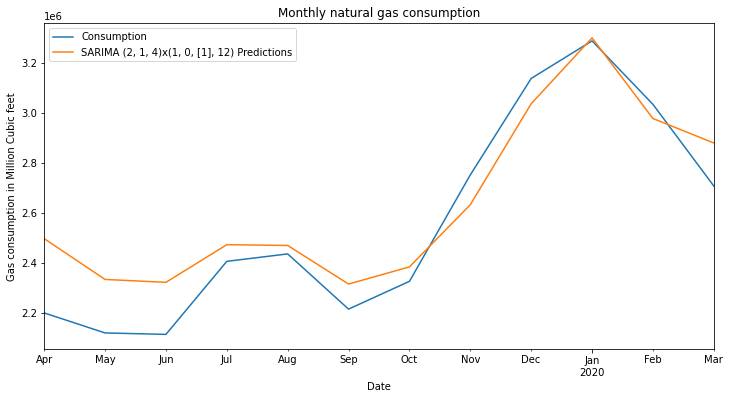

In [37]:
title = "Monthly natural gas consumption"
ylabel="Gas consumption in Million Cubic feet"
xlabel="Date"

ax=test.Consumption.plot(legend=True, figsize=(12,6), title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x', tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
plt.show()

In [38]:
error=mean_squared_error(test.Consumption, predictions)
print(error)

21130816631.336895


In [39]:
error_rmse=rmse(test.Consumption, predictions)
print(error_rmse)

145364.42698038917


I just want to check how the model with $D=1$ performs.

In [41]:
model_sarima2 = SARIMAX(train.Consumption, order=(2,1,4), seasonal_order=(1,1,1,12))
results2 = model_sarima2.fit()
predictions2 = results2.predict(start=start, end=end, dynamic=False).rename("SARIMA (2, 1, 4)x(1, 1, [1], 12) Predictions")

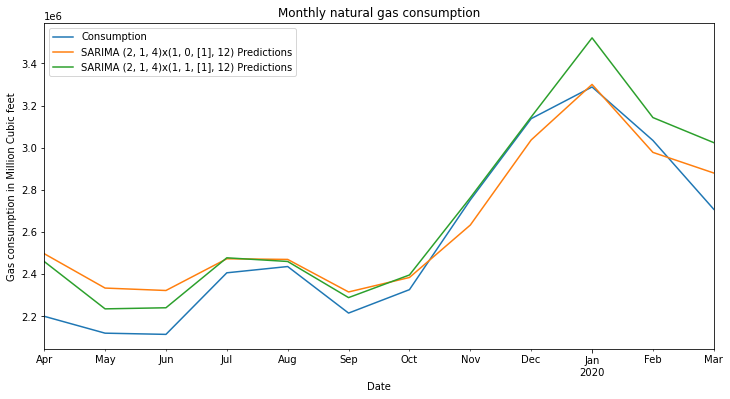

In [42]:
title = "Monthly natural gas consumption"
ylabel="Gas consumption in Million Cubic feet"
xlabel="Date"

ax=test.Consumption.plot(legend=True, figsize=(12,6), title=title)
predictions.plot(legend=True)
predictions2.plot(legend=True)
ax.autoscale(axis='x', tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
plt.show()

In [43]:
error=mean_squared_error(test.Consumption, predictions2)
print(error)
error_rmse=rmse(test.Consumption, predictions2)
print(error_rmse)

23224570439.360355
152396.09719202245


The second model is not that good as the first one. We're going to use the first one to make forecast.

Lest create the model on the whole dataset and forecast 12 months

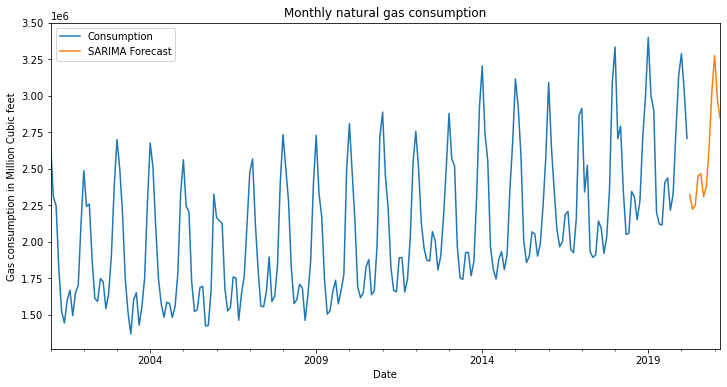

In [44]:
model = SARIMAX(gas_df.Consumption, order=(2,1,4), seasonal_order=(1,0,1,12))
results_forecast = model.fit()
fcast = results_forecast.predict(len(gas_df), len(gas_df) + 11, dynamic=False).rename("SARIMA Forecast")

title = "Monthly natural gas consumption"
ylabel="Gas consumption in Million Cubic feet"
xlabel="Date"

ax=gas_df.Consumption.plot(legend=True, figsize=(12,6), title=title)
fcast.plot(legend=True)
ax.autoscale(axis='x', tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
plt.show()